# Predator Prey Agent Based Modelling in Python

Use what you have learned through this intermediate Python course to produce a *'predator-prey'* agent based modelling simulation. Your task is to program the classes which describe the eating and breeding behaviour of a predator and its prey - we'll use rabbits and foxes in this example - and a domain in which they operate.

|Class: Predator  |  Class: Prey   |
|-----------------------------|----------------------------|
|![The_Predator](data/fox.png)|![The_prey](data/rabbit.png)|

**Note: do not get confused between the current task and the "predator prey problem", which models the interactions between predator and prey through differential equations**

## Implementation

The algorithm behind this example can be imagined as a 2D grid of points on which the rabbits and foxes can move in an interative procedure. The rabbits move first, towards other rabbits for breeding; after this, foxes search for nearby rabbits to eat. All agents move at a rate of 1 i.e. of the 8 directions N, NE, E, SE, S, SW, W, NW.

Tips: First define some constants as:

>* $N_r$ - number of rabbits
>* $N_f$ - number of foxes
>* $P_x$ - number of x points on the grid
>* $P_y$ - number of y points on the grid 
>* $age_f$ - maximum "age" at which foxes die
>* $age_r$ - maximum "age" at which foxes die
>* $rmax$ - radius at which agents will search: if no targets within this influence, move in a random direction

Some suggetions for the implemention may include:

* a base **`Agent`** class with the following attributes and methods
    - `__init__(self, age, loc)` initialiser: adds inputs as attributes (could use **kwargs?)
    - age, attribute - input integer definition age
    - increment_age, method - increments age by 1, and 
    - *loc*, attribute - index (ix, iy) at which the 
    - **move**, method - randomly move in any direction

* **`Predator`** class inhertied from `Agent` class with the following attributes and methods:
    - eat(rad), method: search within a 
    - marker, attribute: string containing 'fox.png' i.e the filename of the plot marker


* **`Prey`** class inherited from `Agent` with the following attributes and methods:
    - breed, method
    - marker, attribute: string containing 'rabbit.png' i.e the filename of the plot marker


* a **`Field`** class with the follow attributes and methods:
    - `**__init__**`(self, Px, Py, predators, preys), initialiser: produce the 2D grid and store all attributes in self 
    - *grid*, attribute: numpy array formed by np.meshgrid of points between 0->Px and 0->Py
    - *predators*, attribute: input list of predator class instances
    - *preys*, attribute: input list of prey class instances
    - **predators**, attribute: input list of predator class instances
    - **distribute()**, method: randomly distribute the predators and preys 
    - **plot**



In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import image
import os
plt.rcParams['figure.figsize'] = (18.0, 10.0)
from abc import ABCMeta, abstractmethod
%matplotlib inline

In [2]:
# Constants:
Nr = 15
Nf = 3

In [7]:
# Classes:
class Agent(metaclass=ABCMeta):
    def __init__(self, age, location, age_death):
        self._age = age    # We don't want anything else to overwrite age: 
                           # Could use encapsulation for self.age
        self.location = np.array(location)
        self.isalive = True
        self.age_death = age_death
    
    def increment_age(self):
        self._age += 1
        if self._age >= self.age_death:
            self.die()
    
    @abstractmethod
    def move(self):
        pass
    
    def die(self):
        self.isalive = False
        self.image = image.imread(os.path.join('data', 'dead.png'))

    def display(self, fig):
        """Displays an image of this instance depending on life status"""
        aximg = fig.add_axes([self.location[0], self.location[1], 0.05, 0.05])
        aximg.axis('off')
        aximg.imshow(self.image)            


class Prey(Agent):
    """This class """
    age_death = 200

    def __init__(self, age=0, location=(0.,0.)):
        super(Prey, self).__init__(age=age, location=location, age_death=Prey.age_death)
        self.image = image.imread(os.path.join('data', 'rabbit.png'))

    def move(self):
        """randomly moves x, y, location of this instance (gaussian)"""
        if self.isalive:
            move_vec = np.random.uniform(-1, 1, 2)
            
            # scale by unit vector and scale by speed
            move_vec = move_vec / np.linalg.norm(move_vec)  
            self.location += move_vec * 0.02
            
            # Set up periodic boundaries
            if self.location[0] > 1:
                self.location[0] -= 1
            elif self.location[0] < 0:
                self.location[0] += 1
            
            if self.location[1] > 1:
                self.location[1] -= 1
            elif self.location[1] < 0:
                self.location[1] += 1
            
            # Finally increment the age
            self.increment_age()
        else:
            pass
        

class Predator(Agent):
    """This class extends Agent so that it will be destroyed after 200 iterations"""
    age_death = 50

    def __init__(self, age=0., location=(0.,0.), preylist=[]):
        super(Predator, self).__init__(age=age, location=location, age_death=Predator.age_death)
        
        self.image = image.imread(os.path.join('data', 'fox.png'))
        self.preylist = preylist
        self.find_prey()

    def move(self):
        """Update the position of this instance if self.isalive is true"""
        if self.isalive:
            self.find_prey()
            move_vec = self.nearest_prey.location - self.location
            distance = np.linalg.norm(move_vec)
            if distance < 0.05 and self.nearest_prey.isalive:
                # Eat the prey
                self.nearest_prey.die()
            else:
                # Scale movement to unit vector and multiply by speed
                self.location += move_vec / distance * 0.05 
            self.increment_age()
        else:
            pass
        
        
    def find_prey(self):
        """Searches through the location of prey items in preylist and
        updates this instance's nearest prey"""
        max_distance = 100
        for prey in self.preylist:
            distance = np.linalg.norm(prey.location - self.location)
            if distance < max_distance and prey.isalive:
                max_distance = distance
                self.nearest_prey = prey


# Misc helper functions
def generate_predator_prey(Npredator, Nprey):
    """Generate Npredator predators and Nprey prey objects with randomly
    distribute locations and ages"""

    prey_locs = np.random.rand(Nr, 2)
    prey_ages = np.random.rand(Nr)
    preys = [Prey(age=prey_ages[i], location=prey_locs[i]) for i in range(Nr)]

    predator_locs = np.random.rand(Nf, 2)
    predator_ages = np.random.rand(Nf)
    predators = [Predator(age=predator_ages[i], location=predator_locs[i],
                          preylist=preys) for i in range(Nf)]
    return predators, preys


def update_predator_prey(predators, preys, fig):
    """Updates the locations of all predators and preys in the inputs and
    displays them in input fig using the Agent.display method"""
    # Clear the figure first
    fig.clf()     
    for predator in predators:
        predator.move()
        predator.display(fig)
        
    for prey in preys:
        prey.move()
        prey.display(fig)

In [8]:
# foxes, rabbits = generate_predator_prey(Nr, Nf)

# fig = plt.figure(figsize=(16,10))
# ax = fig.add_subplot(111)
# ax.axis('off')

# Nit = 11    # Iterate 1 more than the death of all foxes
# outputpath = os.path.abspath('frames')

# for i in range(Nit):
#     update_predator_prey(foxes, rabbits, fig)
    
# #     let's keep the output so we can create an animation later
# #     fig.savefig(os.path.join(outputpath, 'frame'+str(i)))





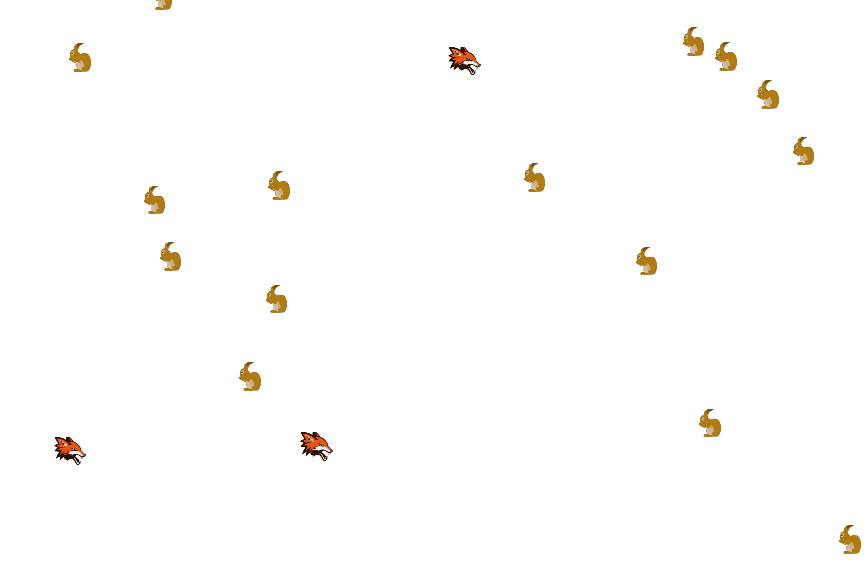
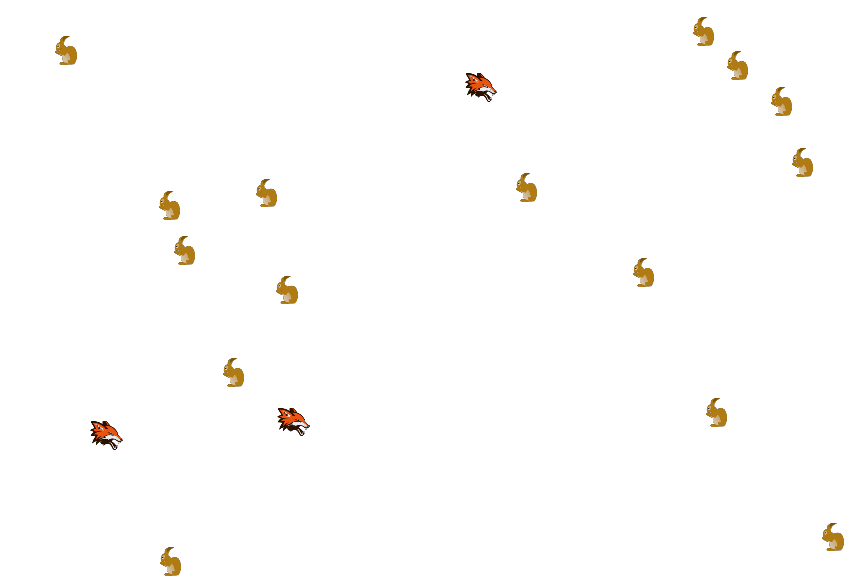
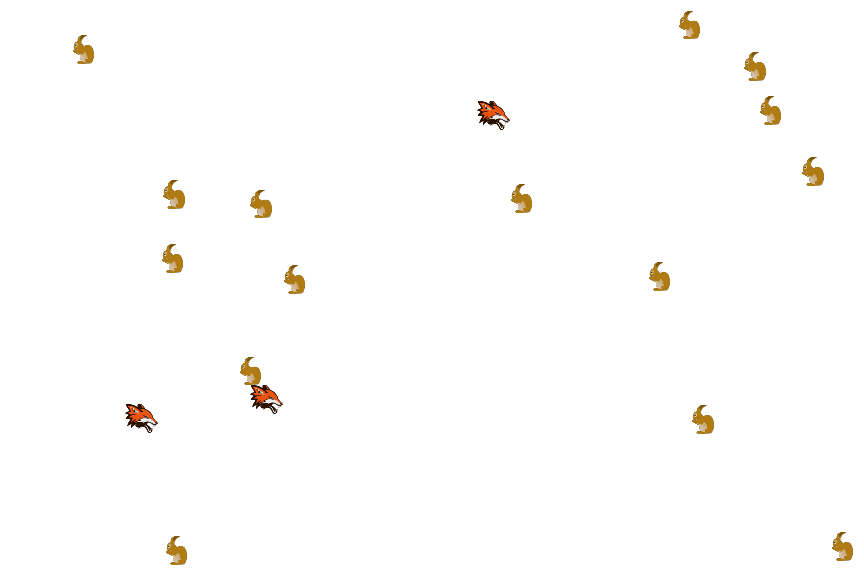
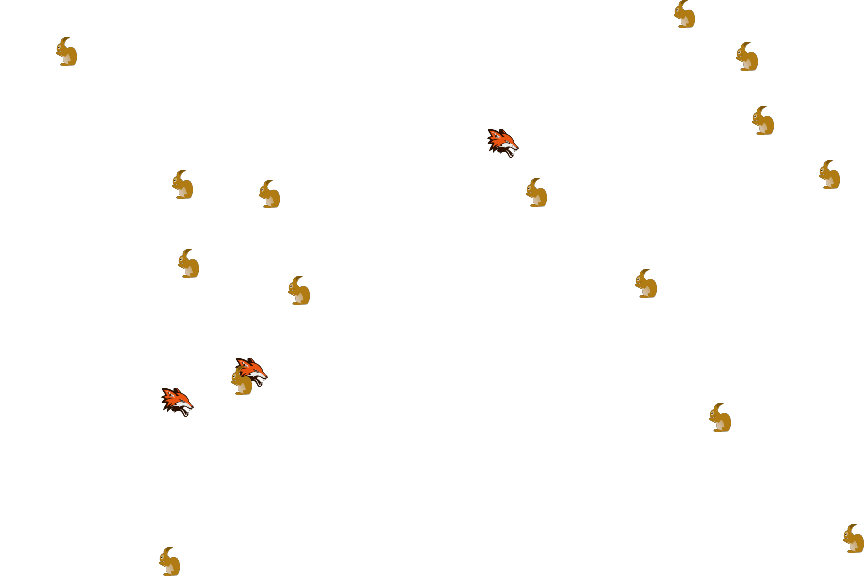
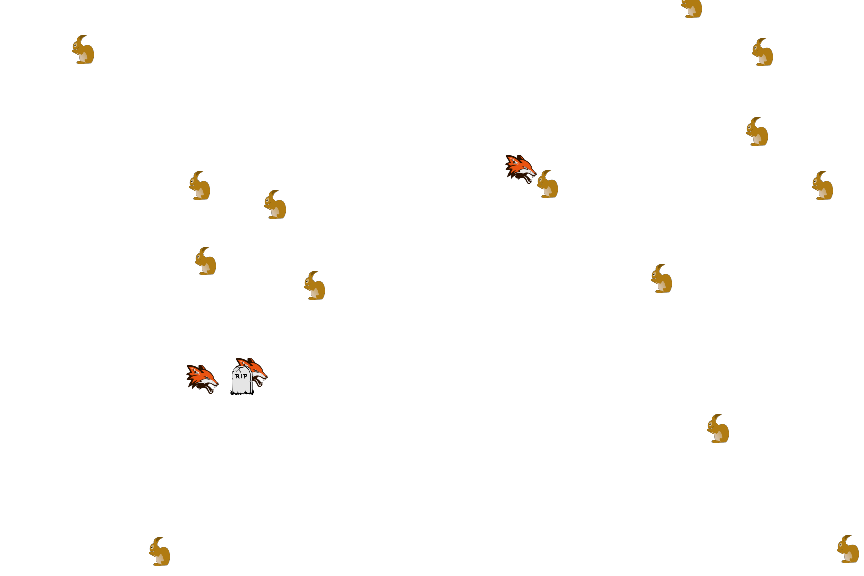
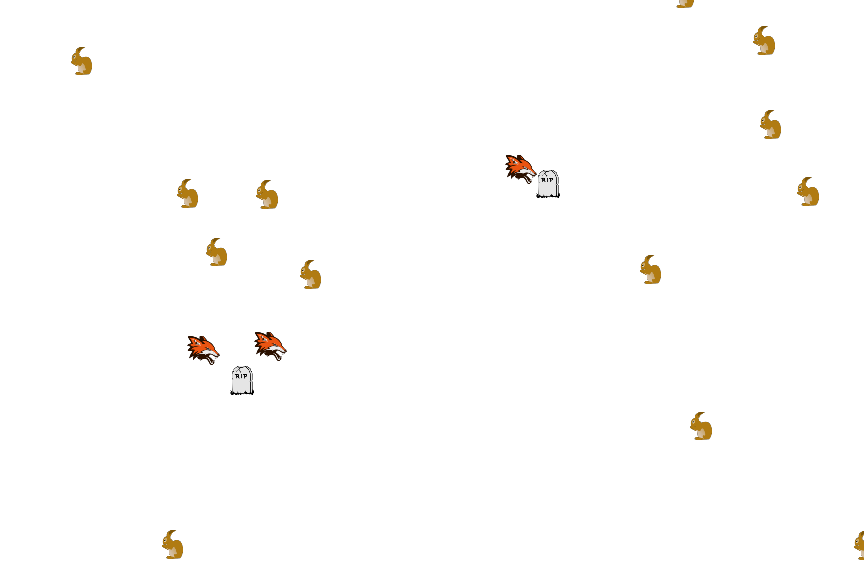
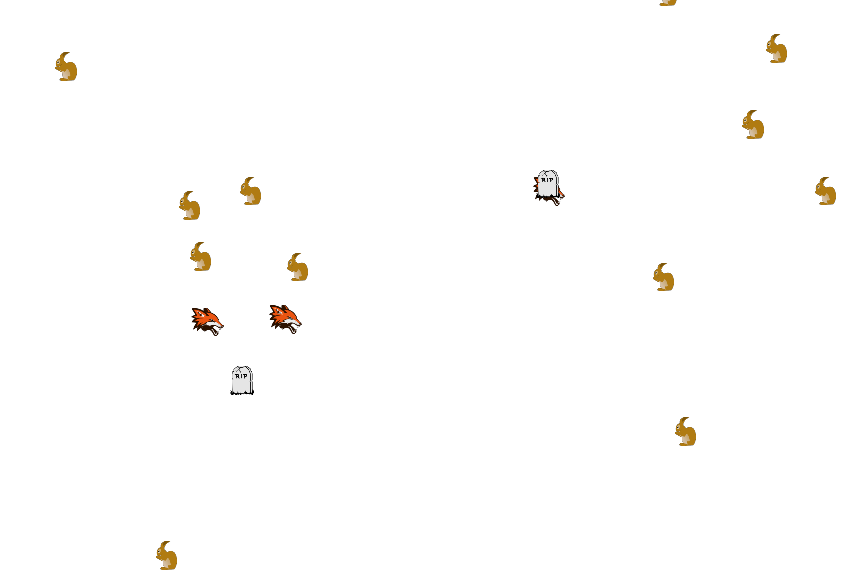
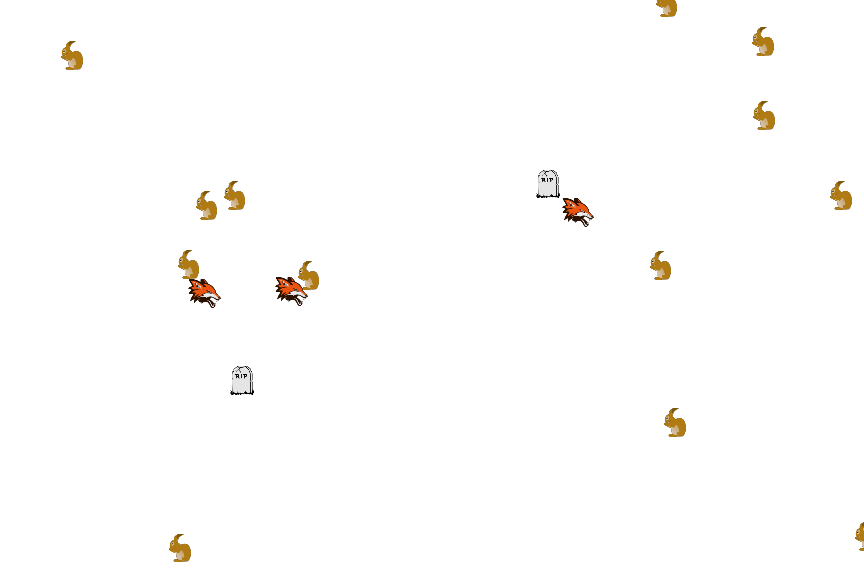
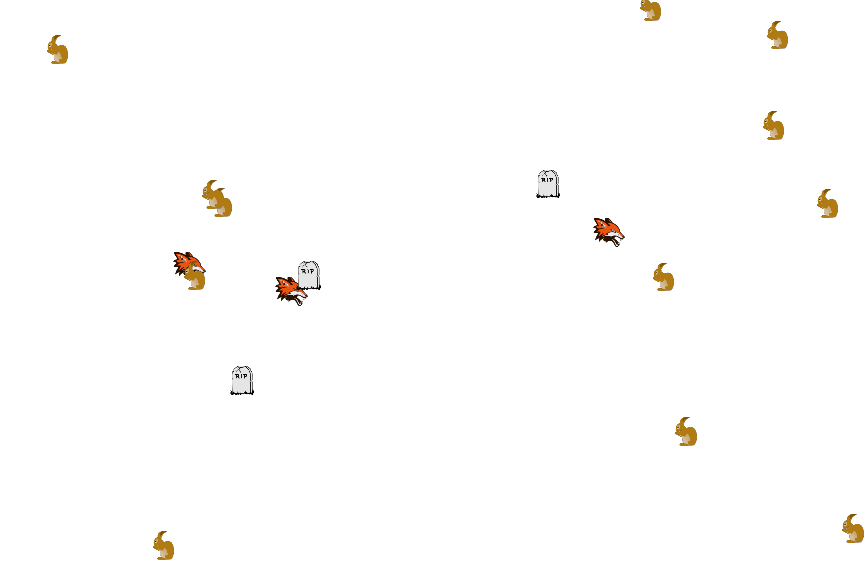
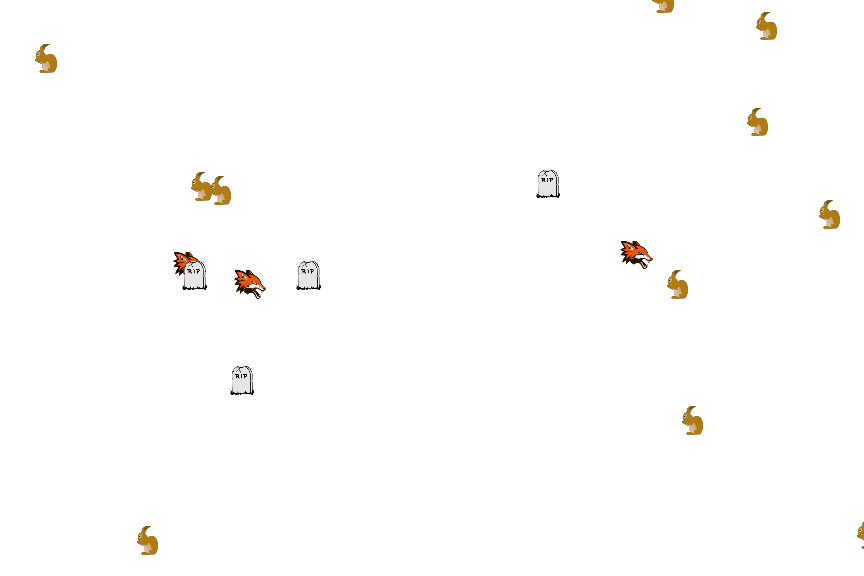
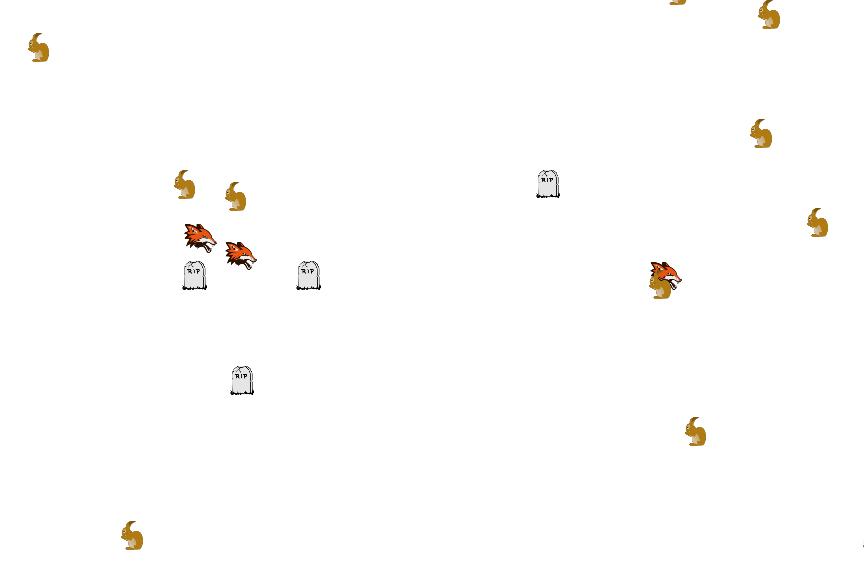
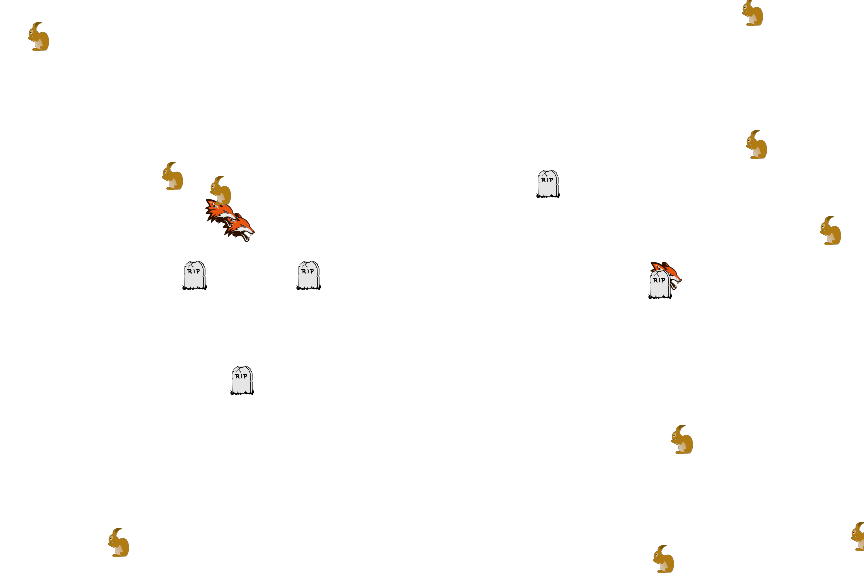
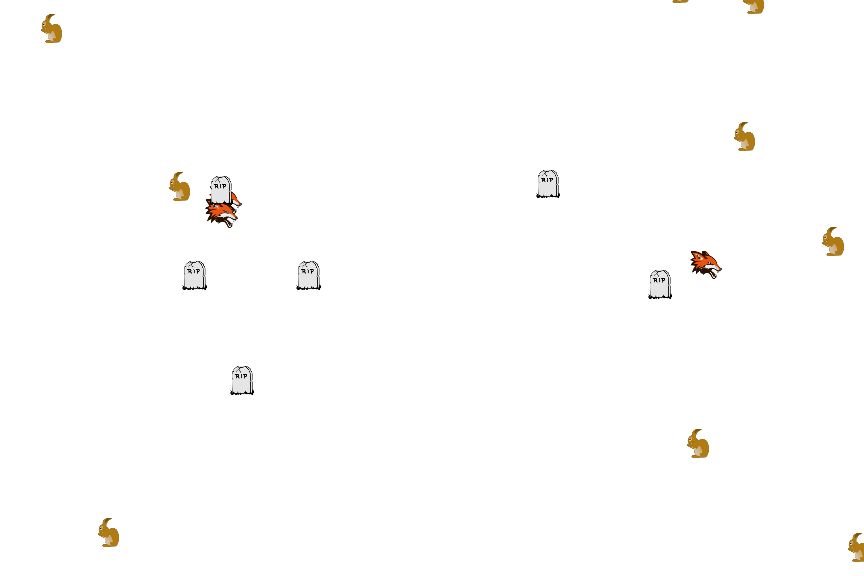
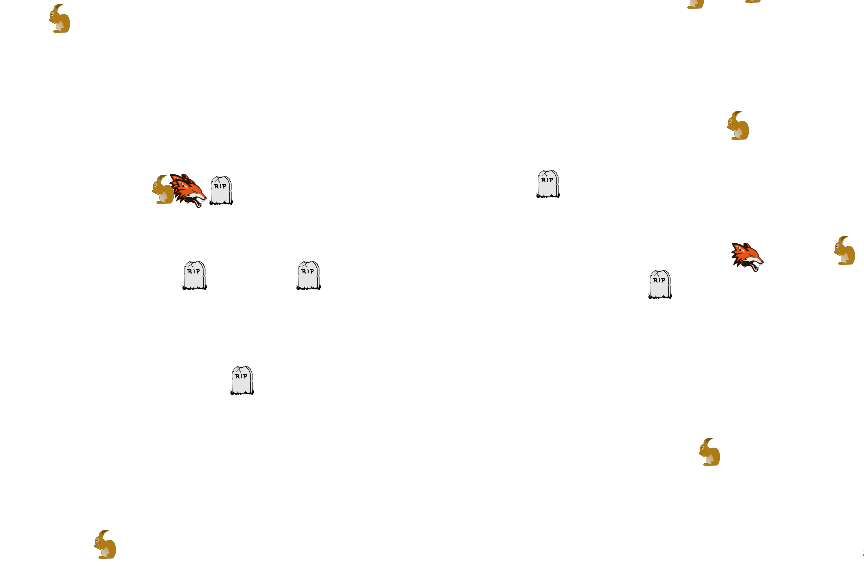
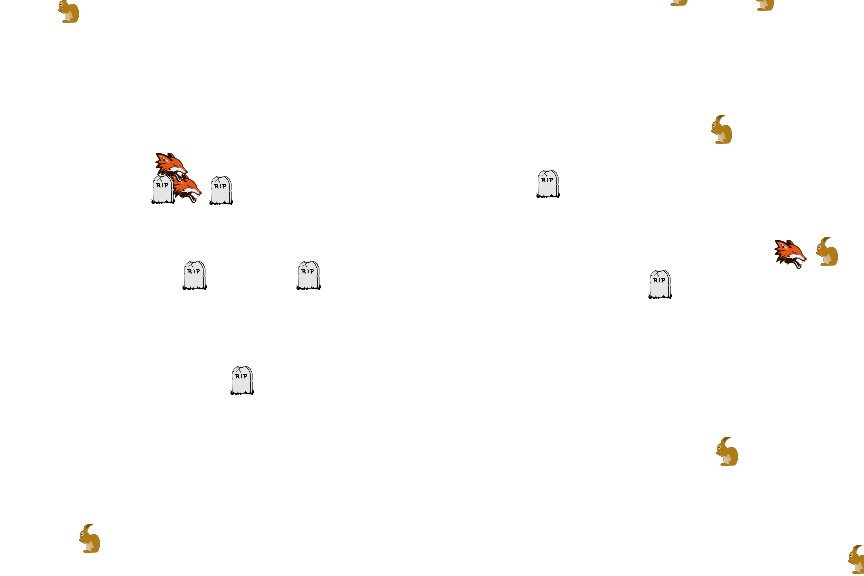
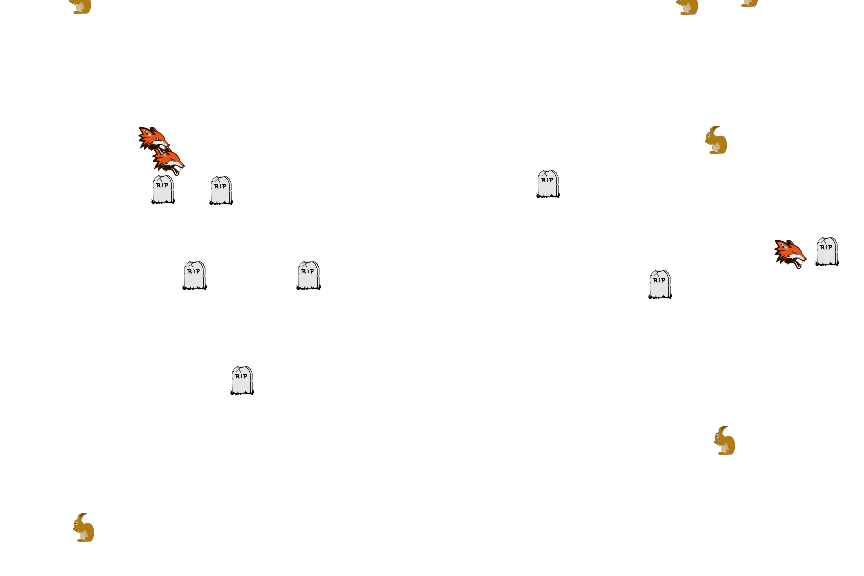
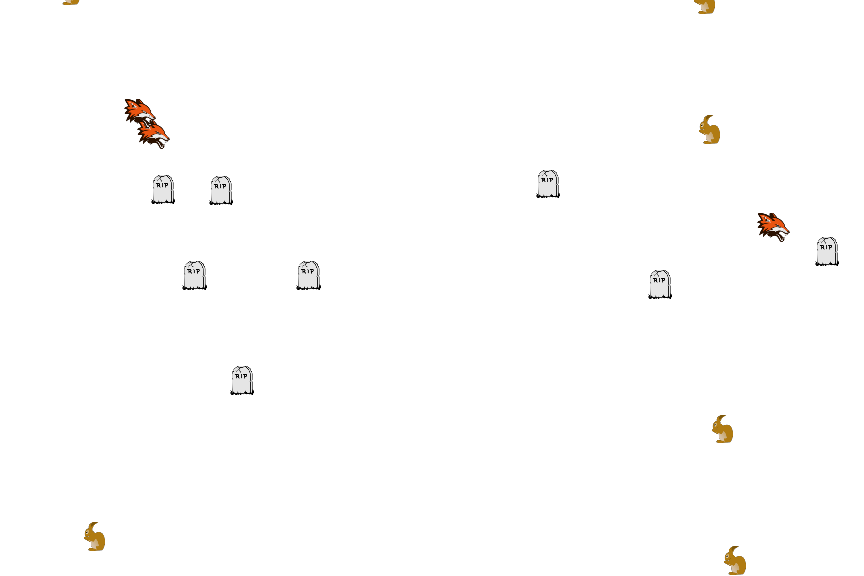
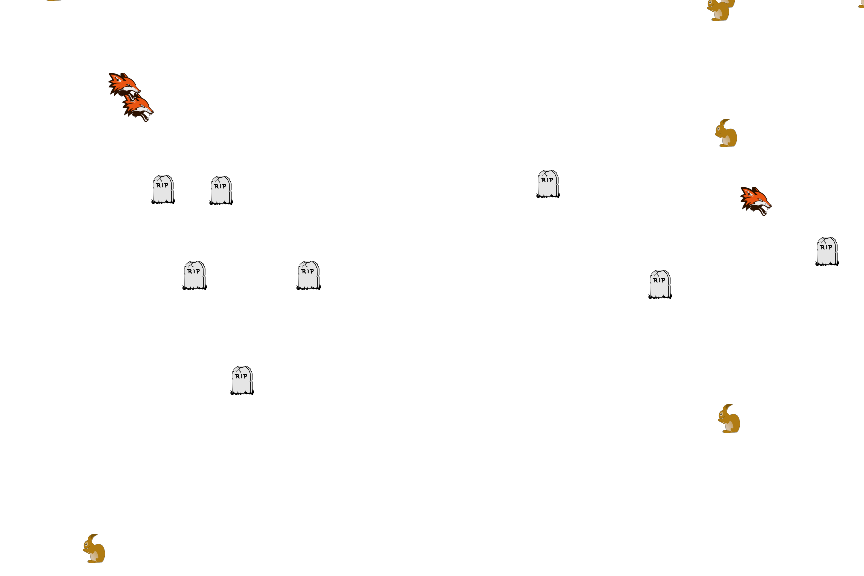
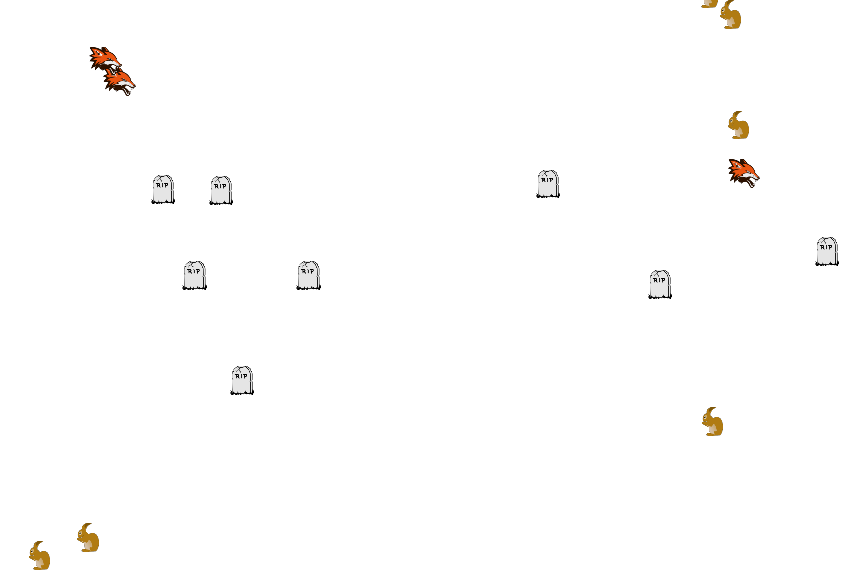
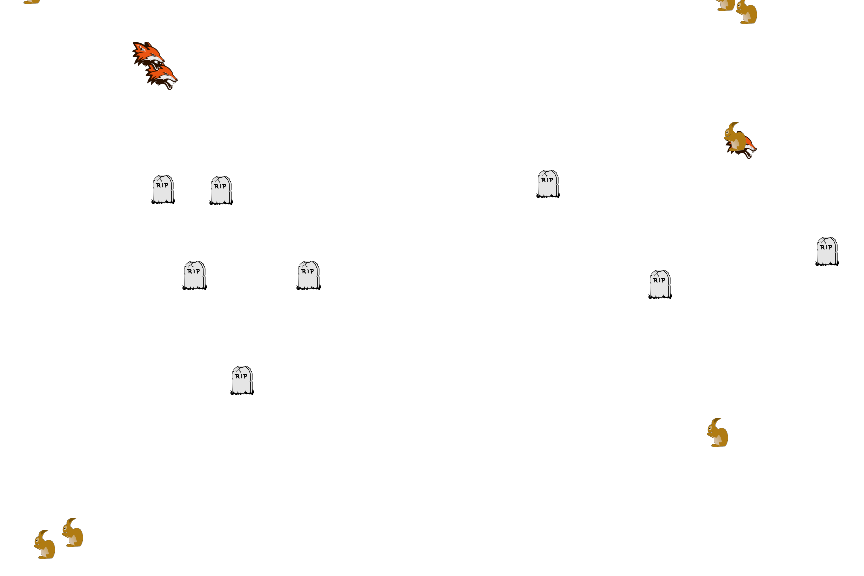
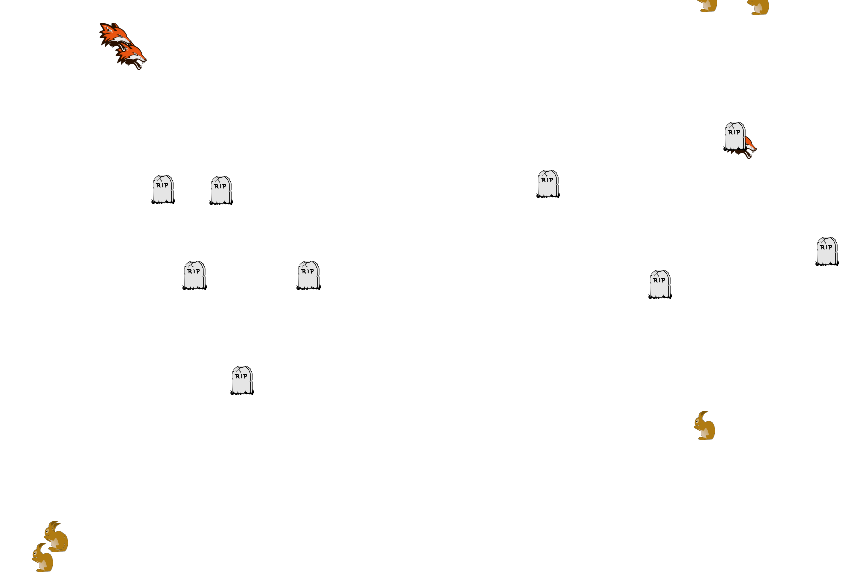
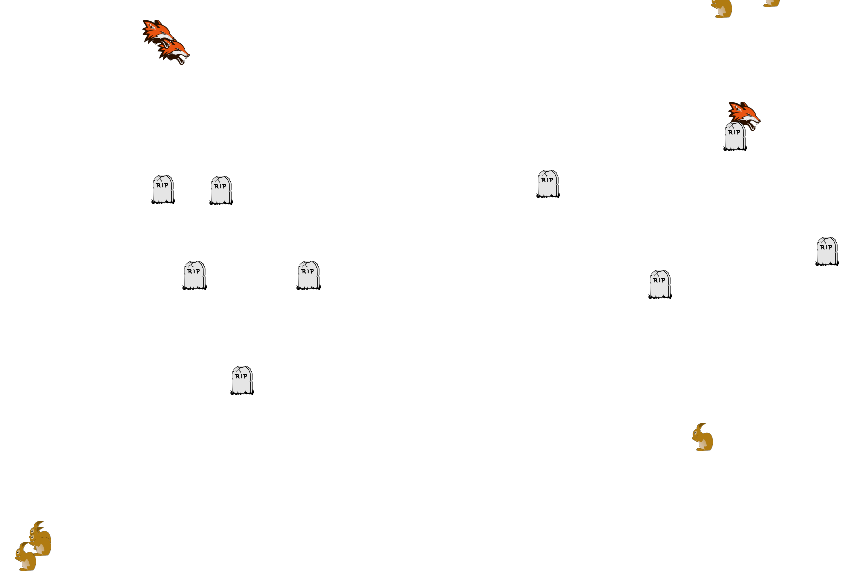
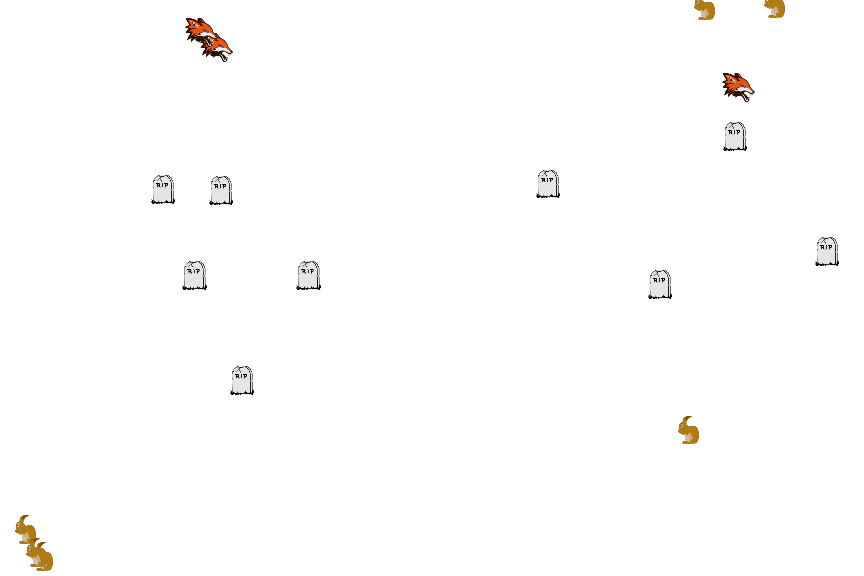
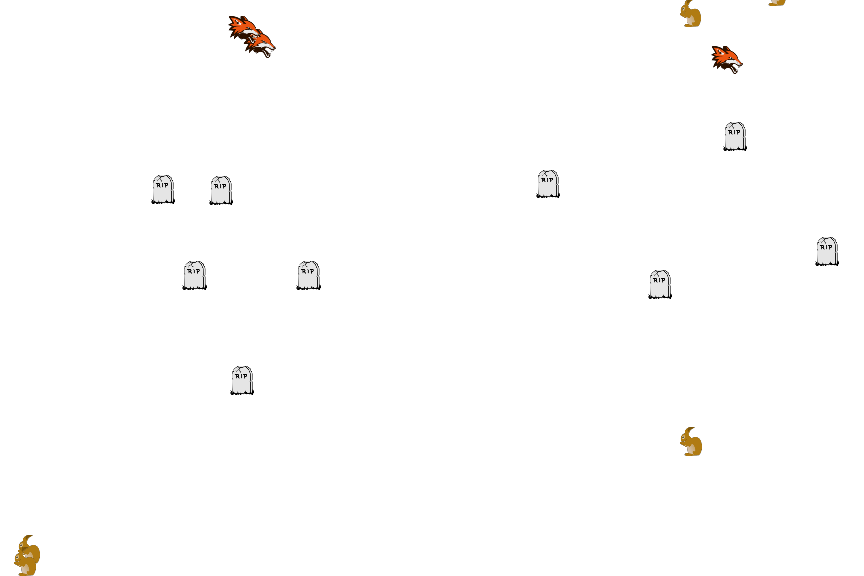
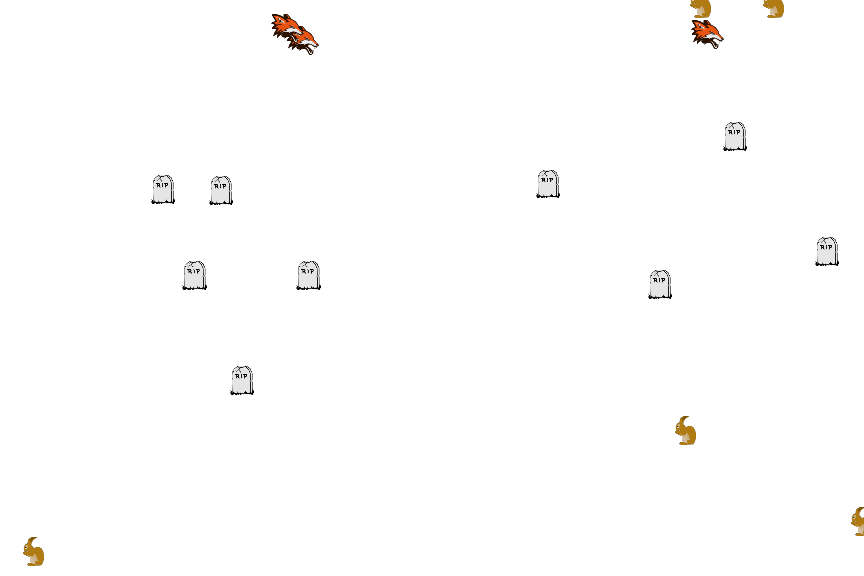
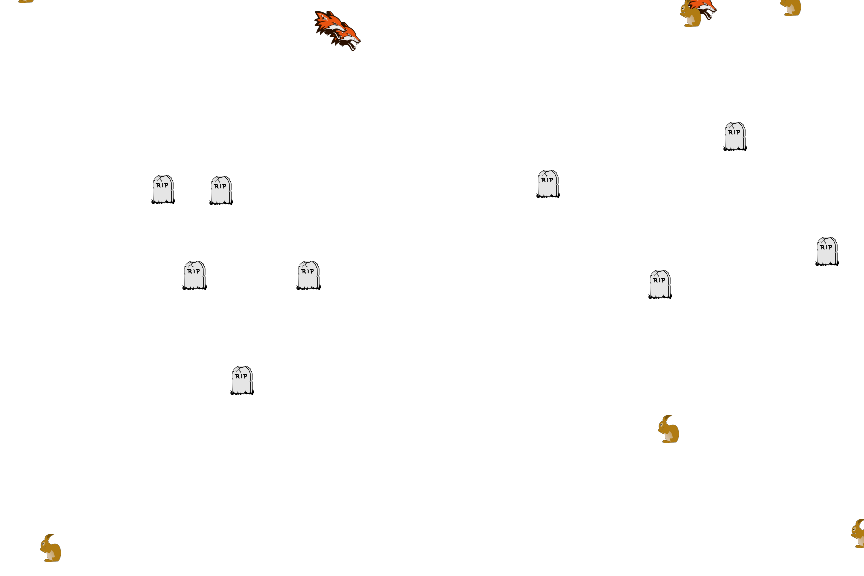
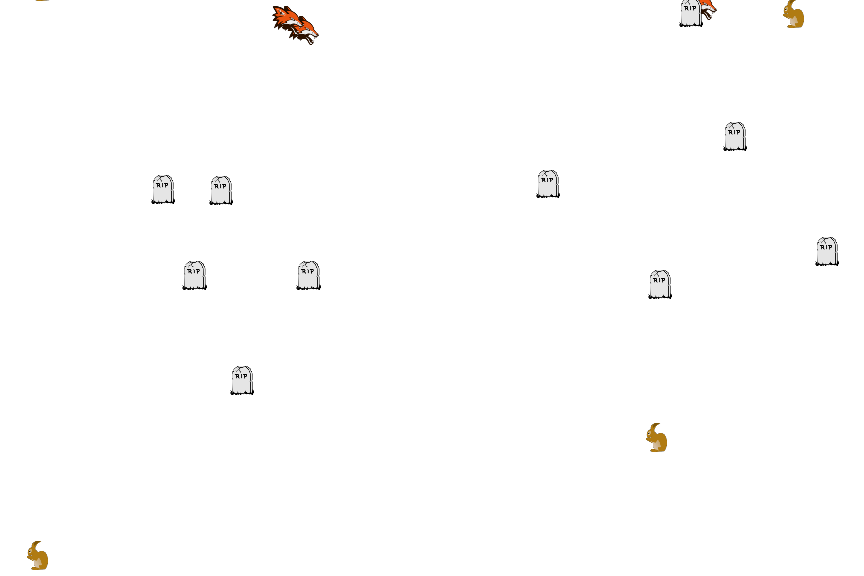
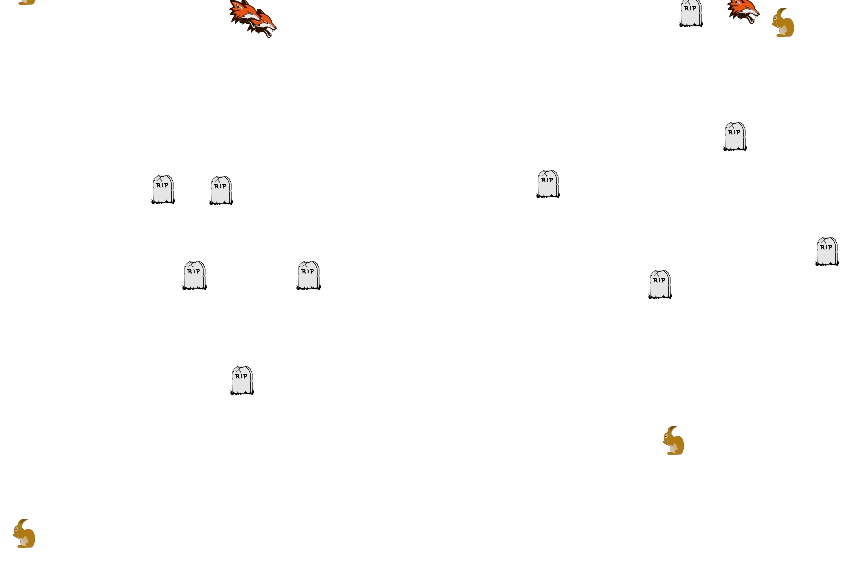
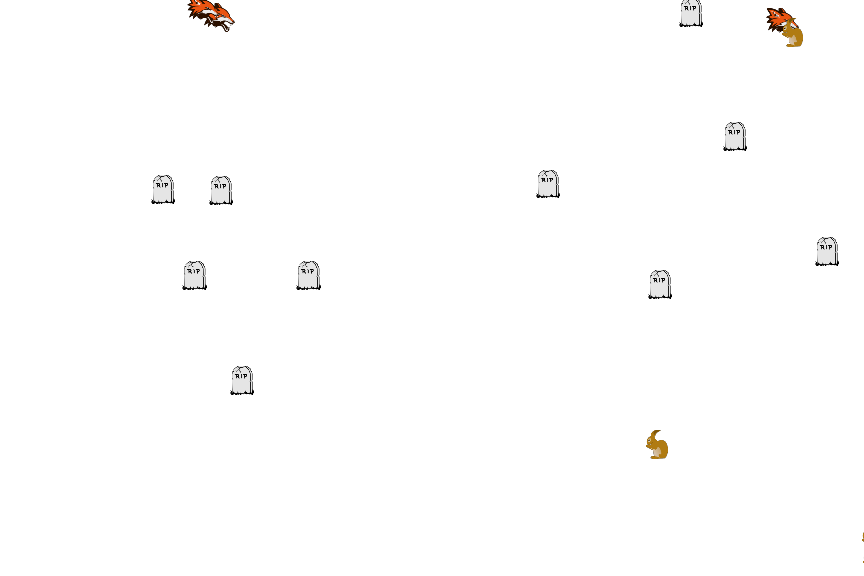
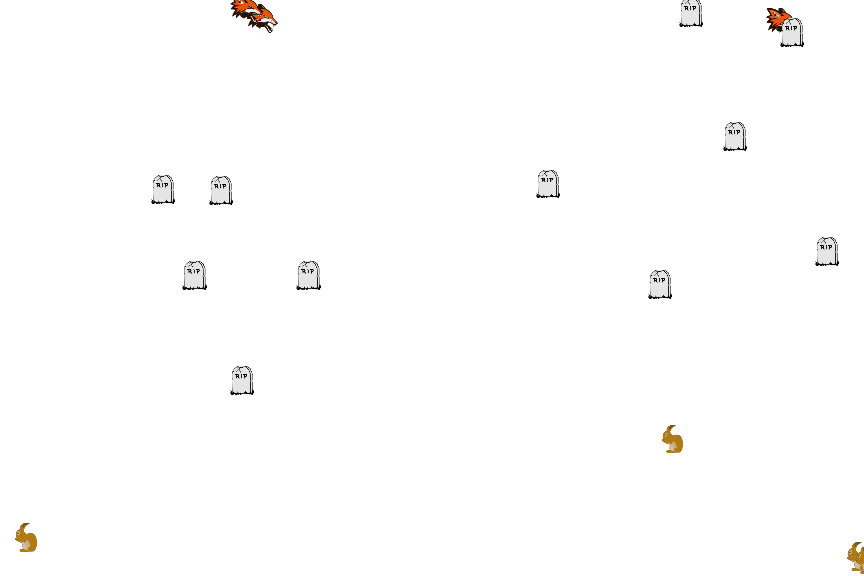
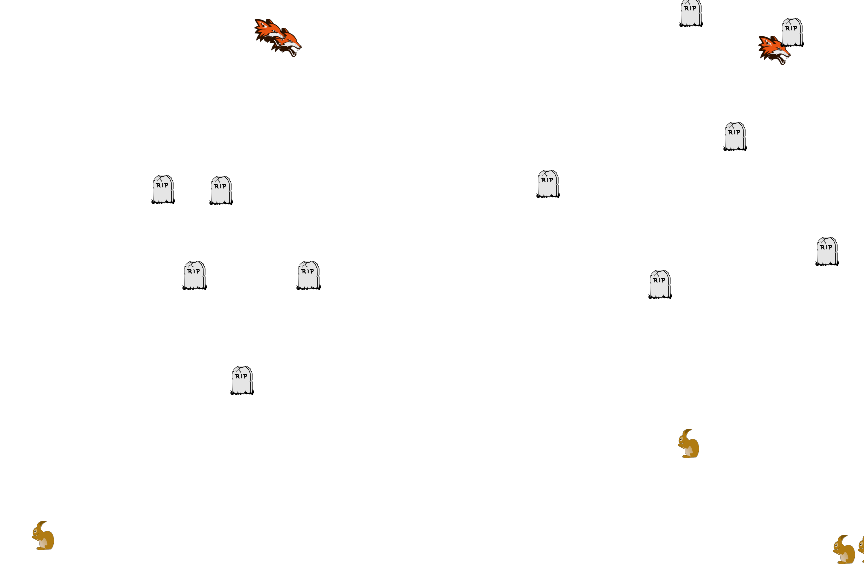
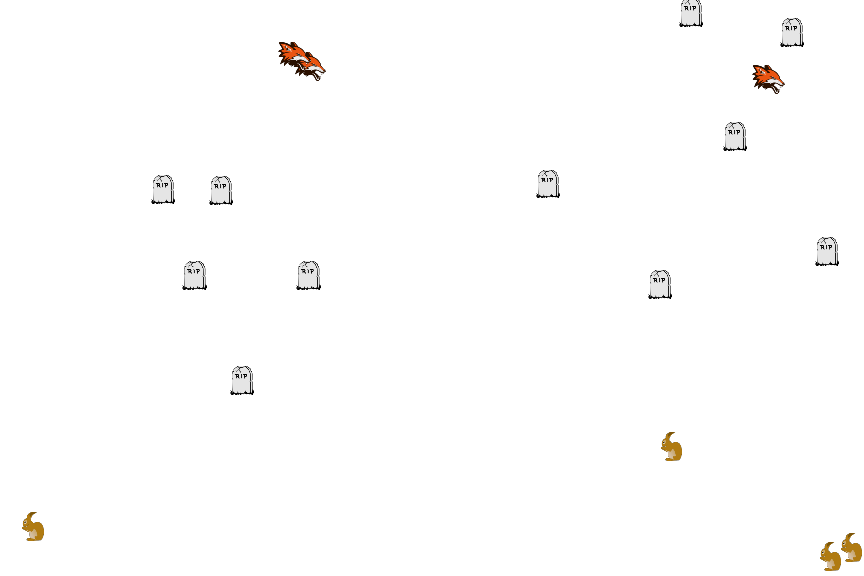
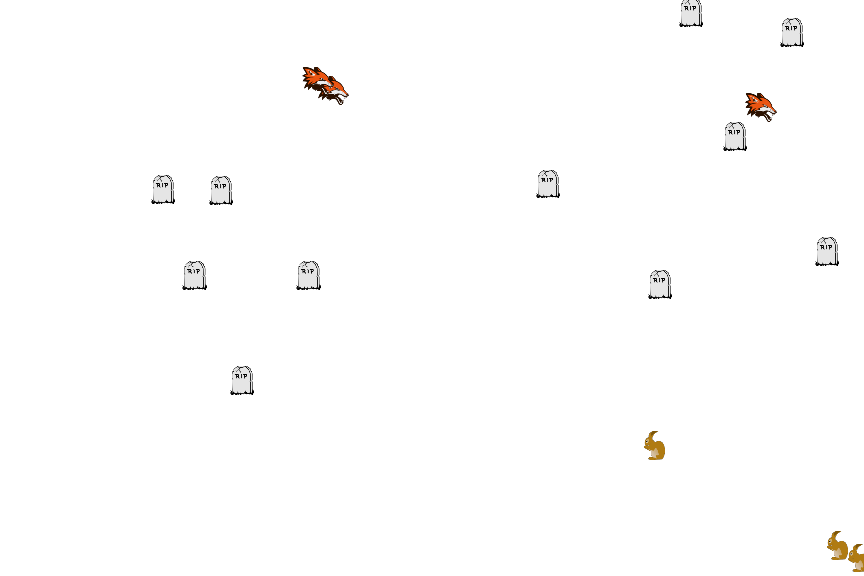
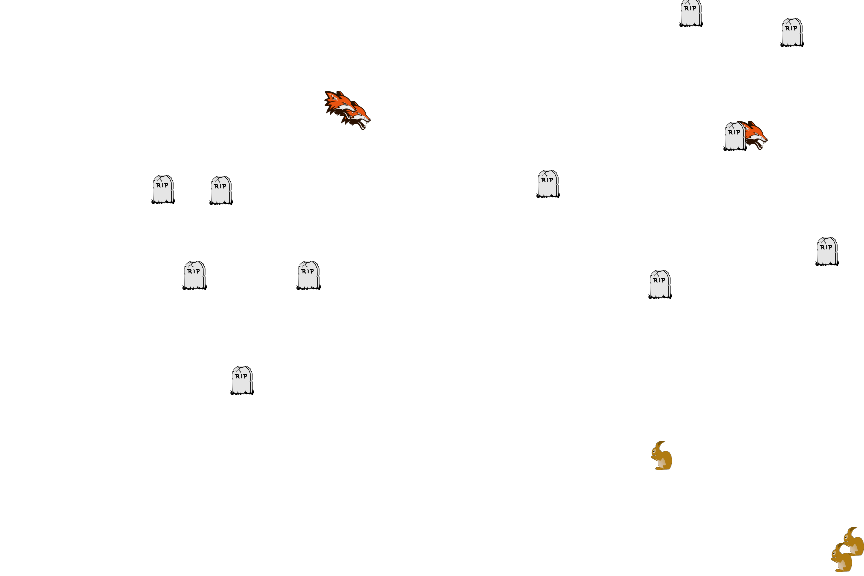
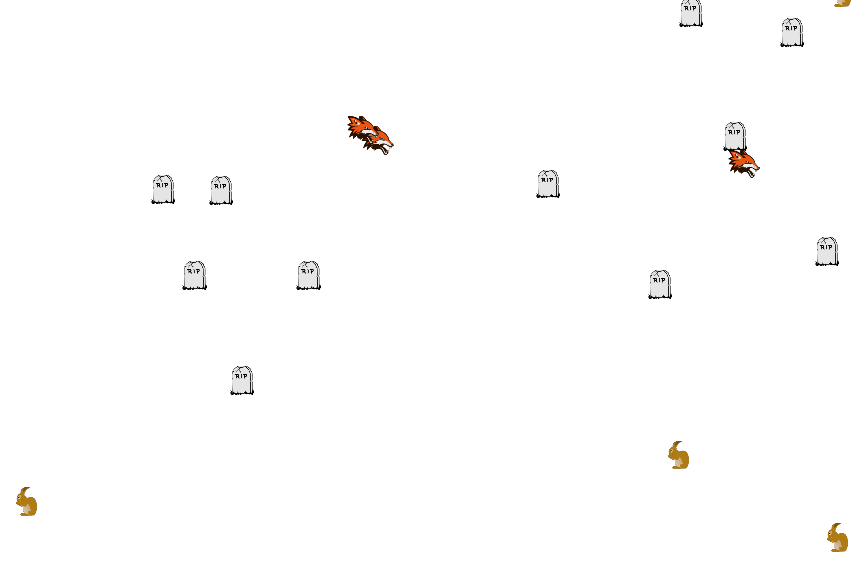
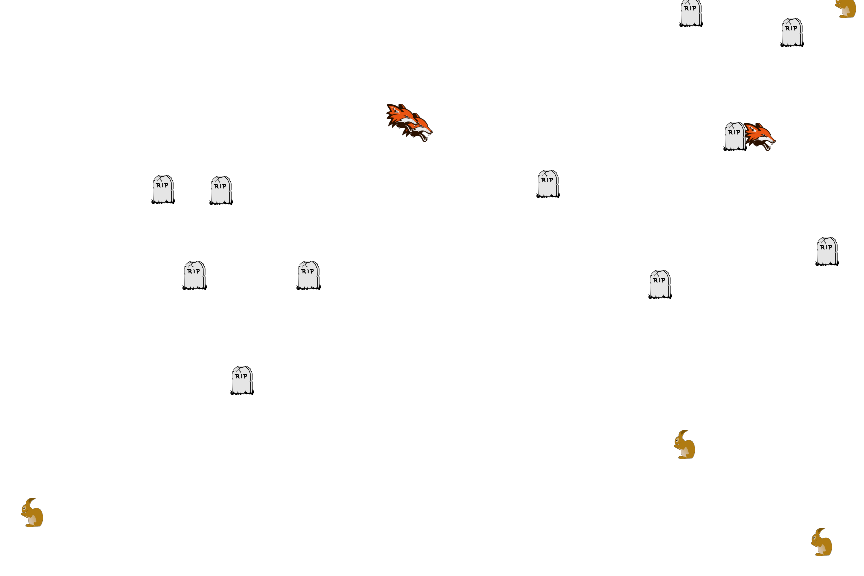
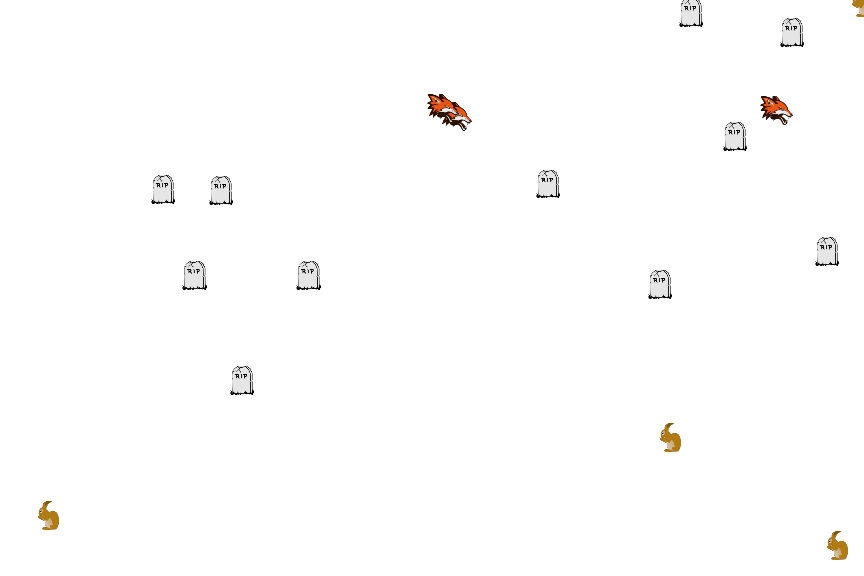
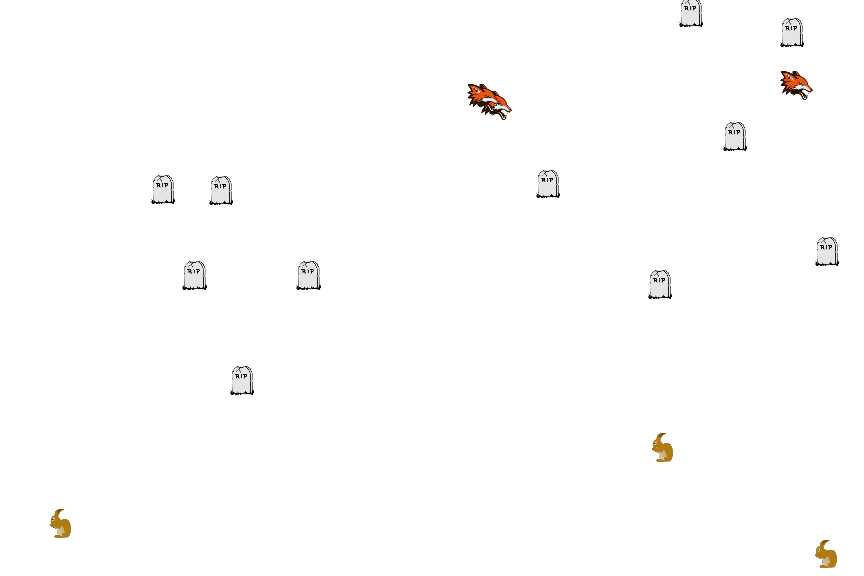
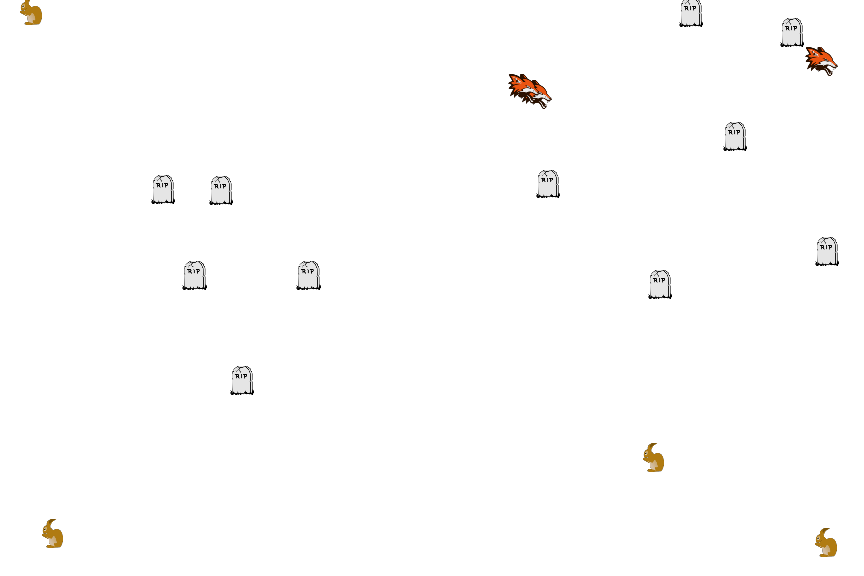
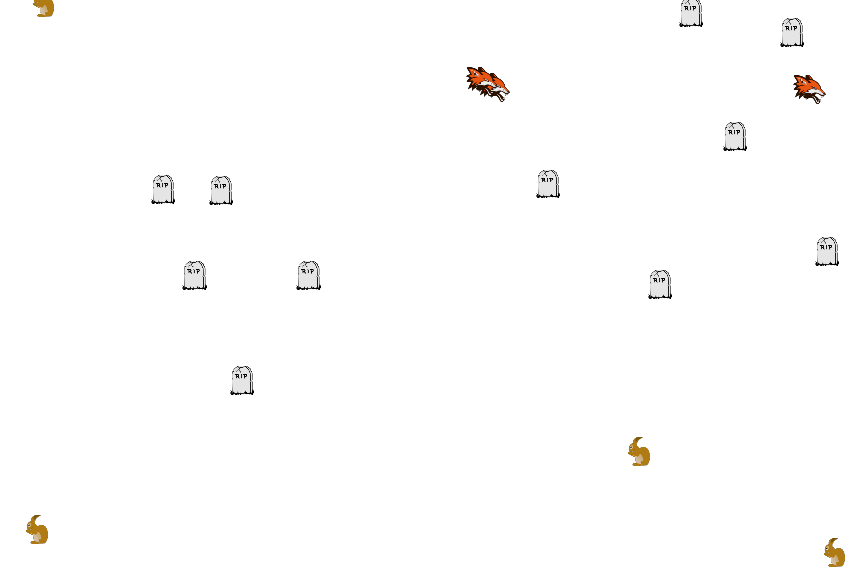
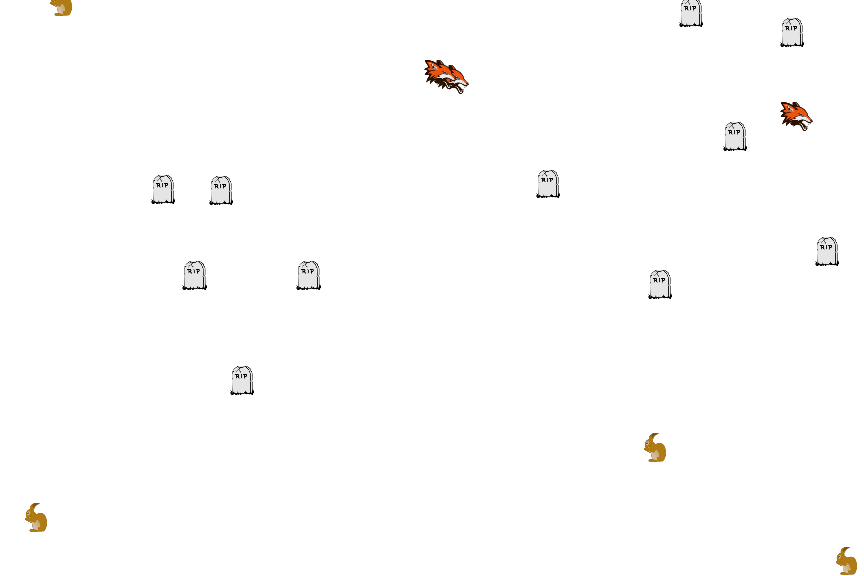
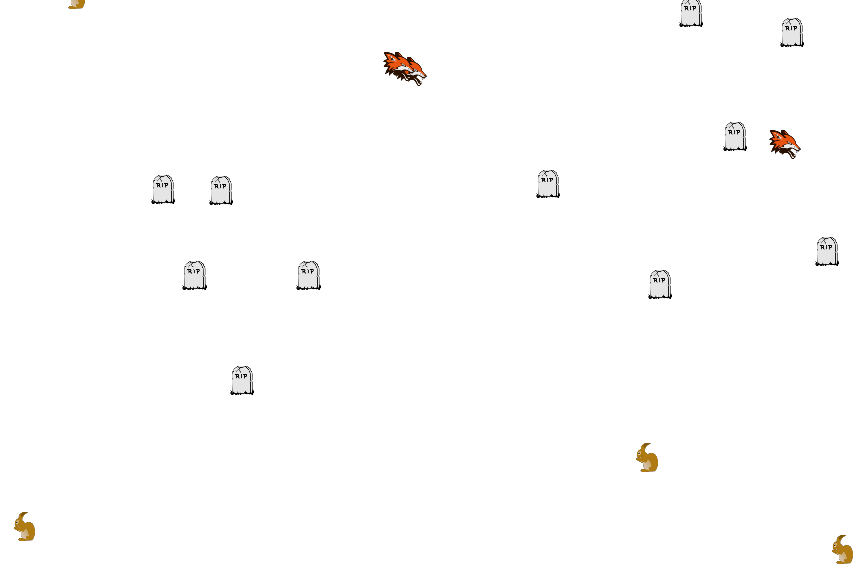
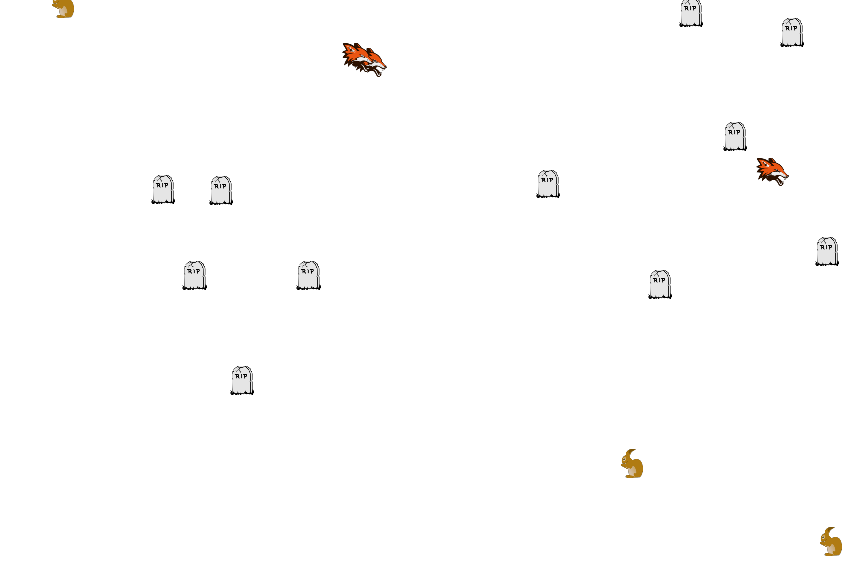
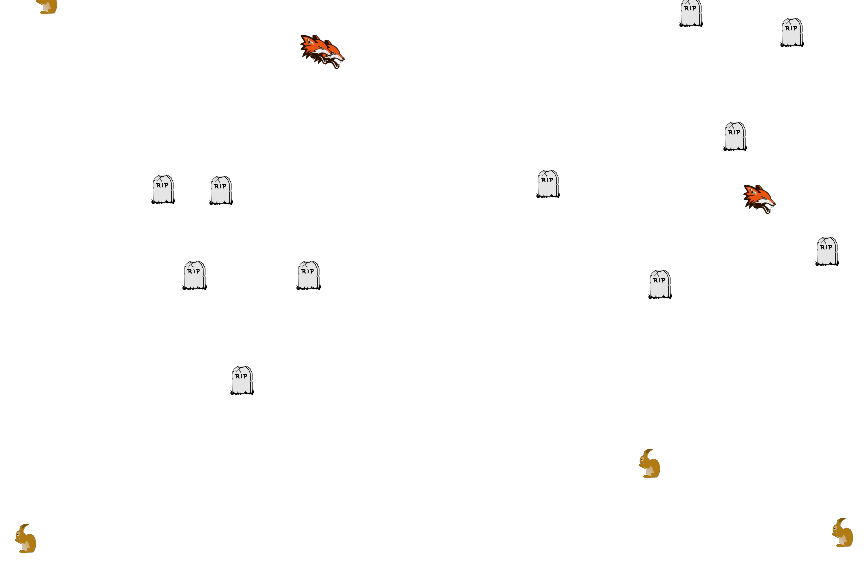
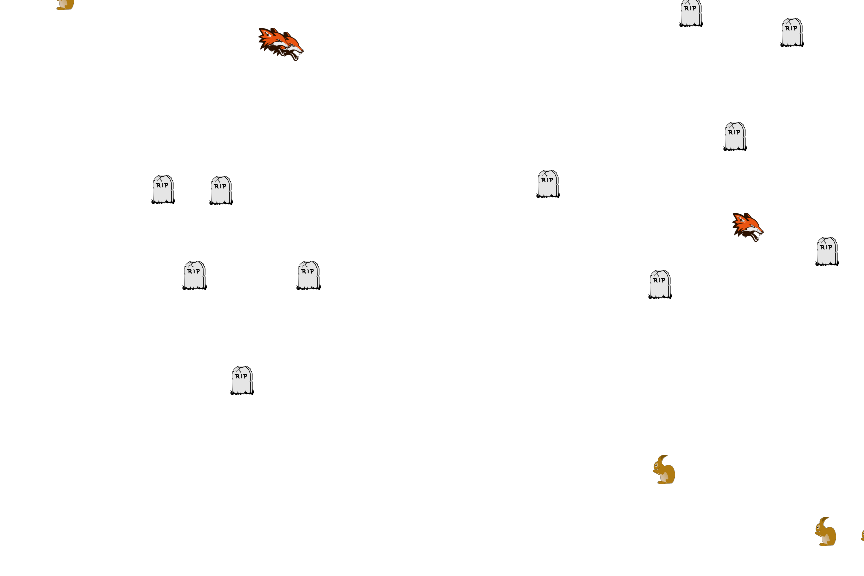
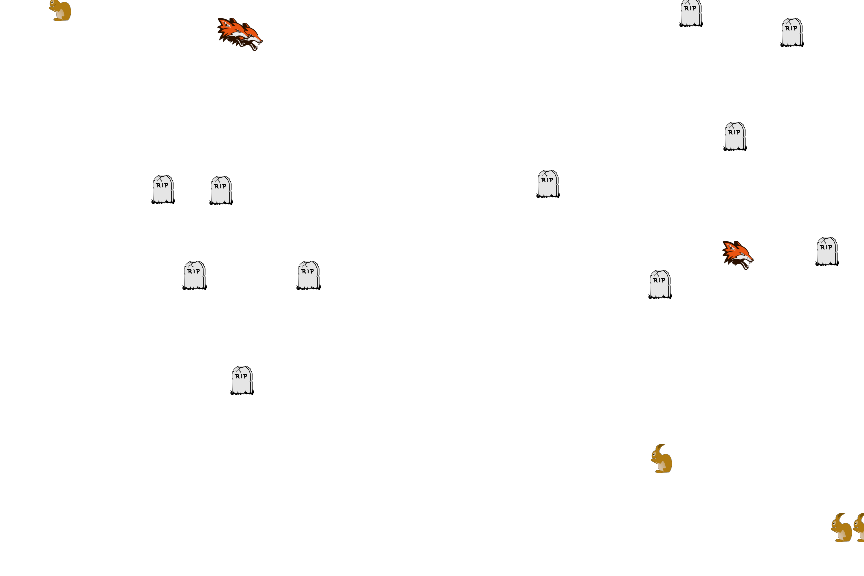
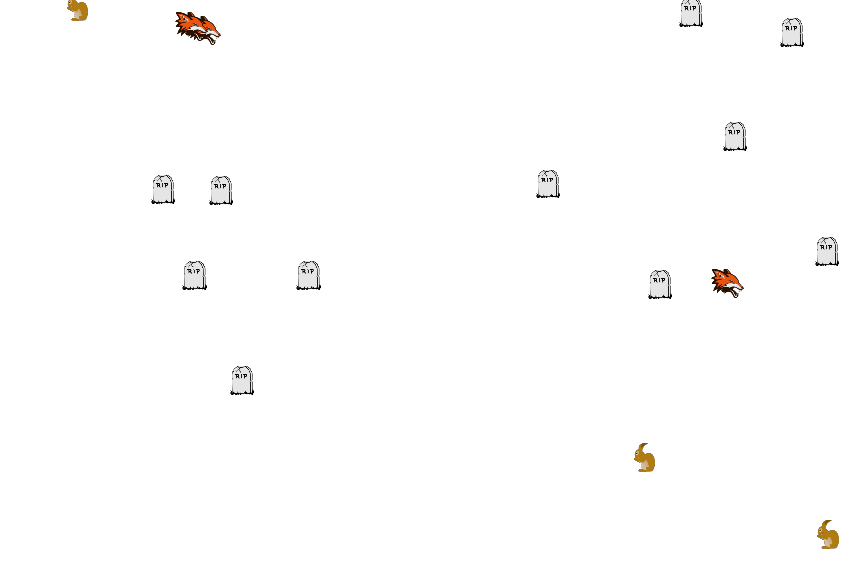
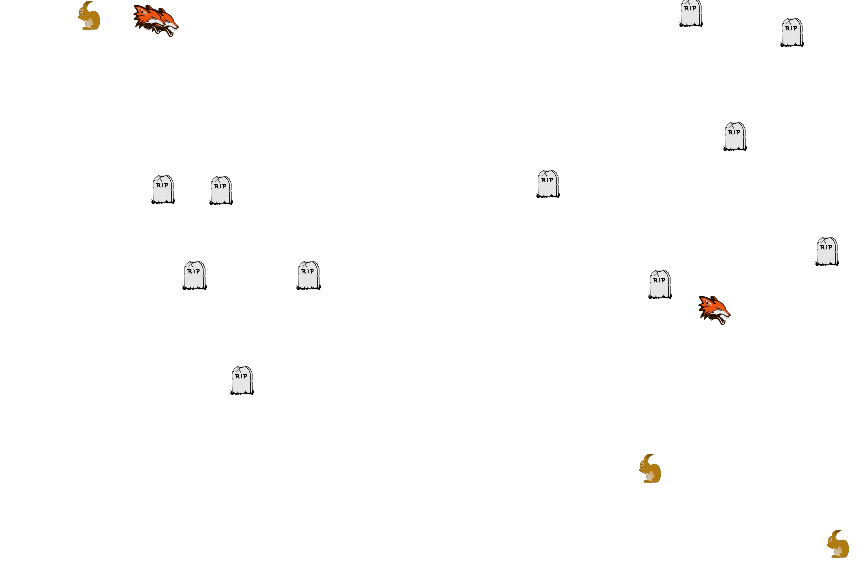
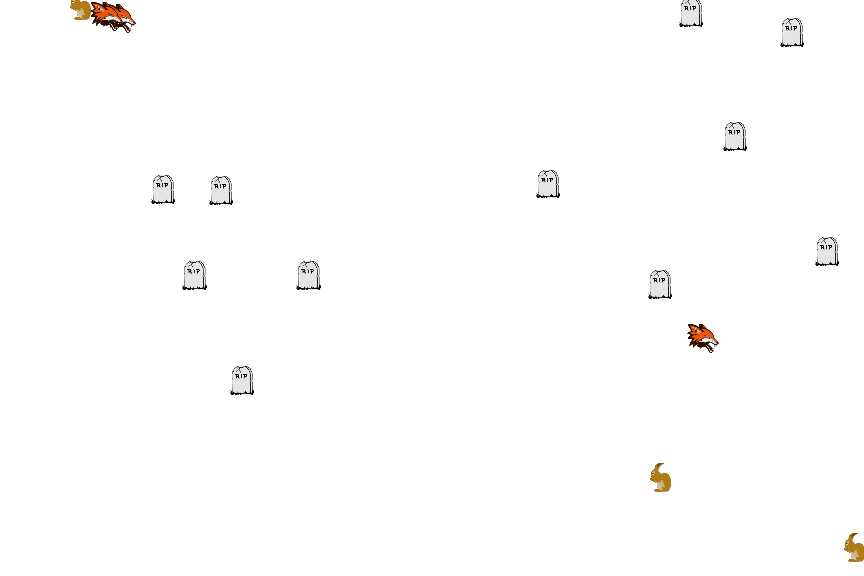
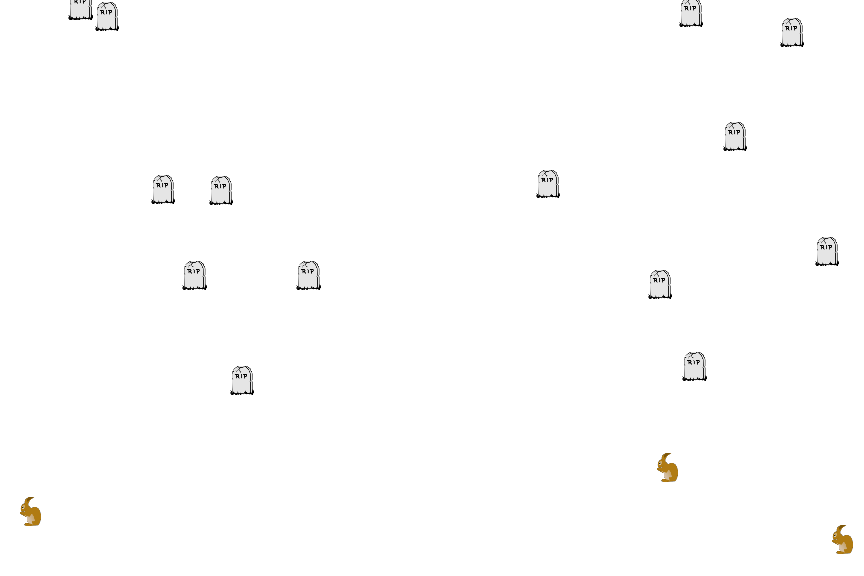
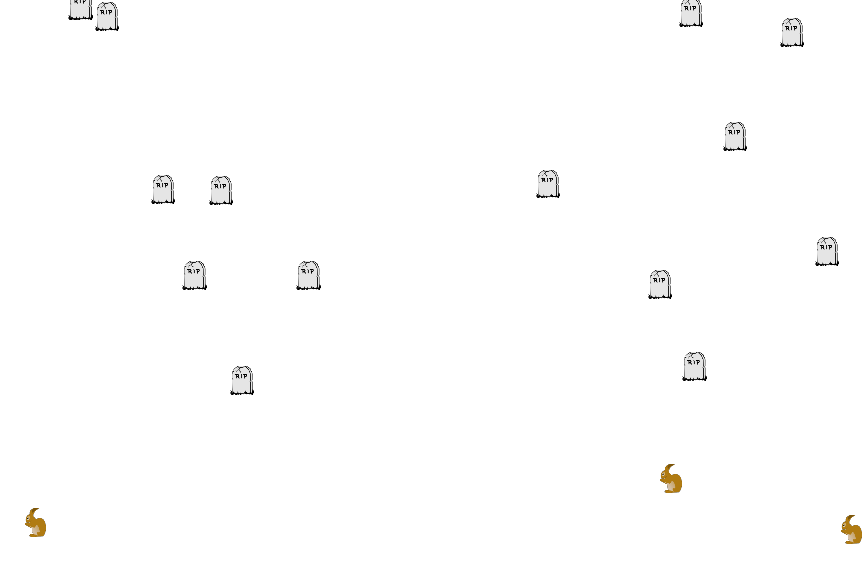

In [9]:
from JSAnimation import IPython_display
from matplotlib import animation

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.axis('off')

Nit = 51    # Iterate 1 more than the death of all foxes

foxes, rabbits = generate_predator_prey(Nr, Nf)


def init():
    fig.clf()

def update_predator_prey(i):
    """Updates the locations of all predators and preys in the inputs and
    displays them in input fig using the Agent.display method"""
    # Clear the figure first
    fig.clf()
    for fox in foxes:
        fox.move()
        fox.display(fig)
    for rabbit in rabbits:
        rabbit.move()
        rabbit.display(fig)

animation.FuncAnimation(fig, update_predator_prey, frames=Nit, interval=1, init_func=init)

## Plotting

**Extension: Animate your simulation using the [JSAnimation package](https://github.com/jakevdp/JSAnimation)**

**Extension 2: Create a generator of predator and prey instances using generator comprehension**